 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [91]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [92]:
# Set file path for whale returns
whale_returns_path = Path("./Resources/whale_returns.csv")



In [93]:
# Read data to create dataframes
whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [94]:
# Display few records for  whale returns
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [95]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [96]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

# Count nulls post cleanup
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [97]:
# Display few records of Whale Returns
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [98]:
# Reading algorithmic returns

algo_returns_path = Path('./Resources/algo_returns.csv')
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display few records of Algo Returns
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [99]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [100]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

# Count nulls post cleanup
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [101]:
# Display few records of Algo Returns
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [102]:
# Read S&P TSX 60 Closing Prices
sp_tsx_history_path= Path('./Resources/sp_tsx_history.csv')
sp_tsx_history_df = pd.read_csv(sp_tsx_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display few records of S&P TSX 60 Returns
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [103]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [104]:
# Fix Data Types

# Remove $
sp_tsx_history_df['Close']=sp_tsx_history_df['Close'].str.replace("$","",regex=True)

# Remove ,
sp_tsx_history_df['Close']=sp_tsx_history_df['Close'].str.replace(",","",regex=True)

# Change coloumn type to float64
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].astype('float64')

# Confirm coloumn type is now float64
sp_tsx_history_df.dtypes


Close    float64
dtype: object

In [105]:
# Calculate Daily Returns for S&P TSX 60
sp_tsx_daily_returns = sp_tsx_history_df.pct_change()

# Check for nulls
sp_tsx_daily_returns.isnull().sum()

Close    1
dtype: int64

In [106]:
# Drop nulls
sp_tsx_daily_returns.dropna(inplace=True)

# Confirm all nulls are dropped
sp_tsx_daily_returns.isnull().sum()

Close    0
dtype: int64

In [107]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns = sp_tsx_daily_returns.rename(columns={'Close':'S&P TSX'})
sp_tsx_daily_returns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [108]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
concatenated_df = pd.concat(
    [
        whale_returns_df,
        algo_returns_df,
        sp_tsx_daily_returns
    ], axis='columns', join='inner'
)

#print(concatenated_df.columns.tolist())

# Sort index in ascending order by the date
concatenated_df = concatenated_df.sort_index()

# Display few records of concatenated_df 
concatenated_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

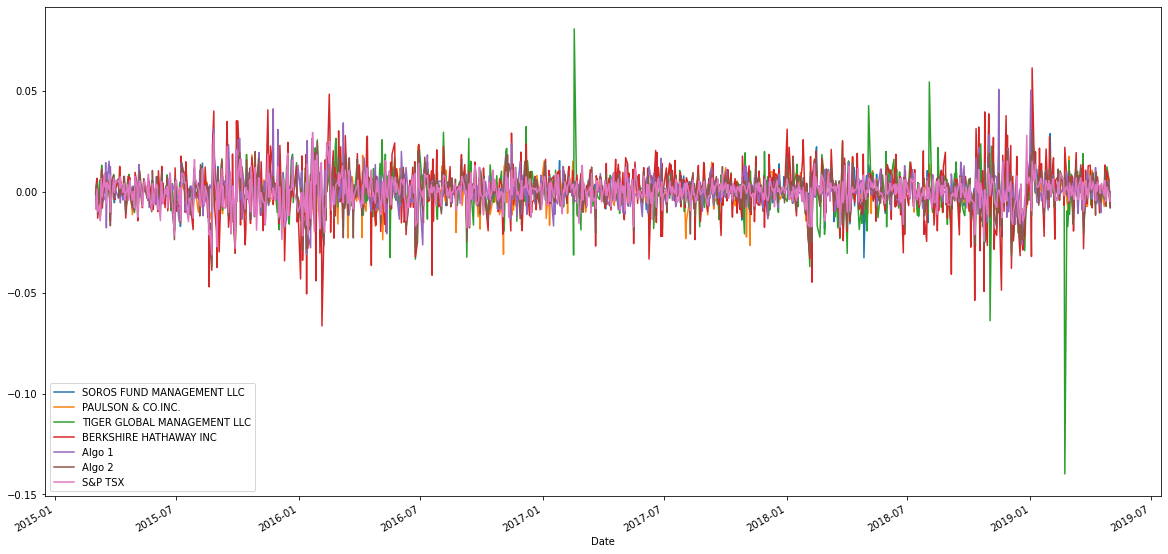

In [109]:
# Plot daily returns of all portfolios
concatenated_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

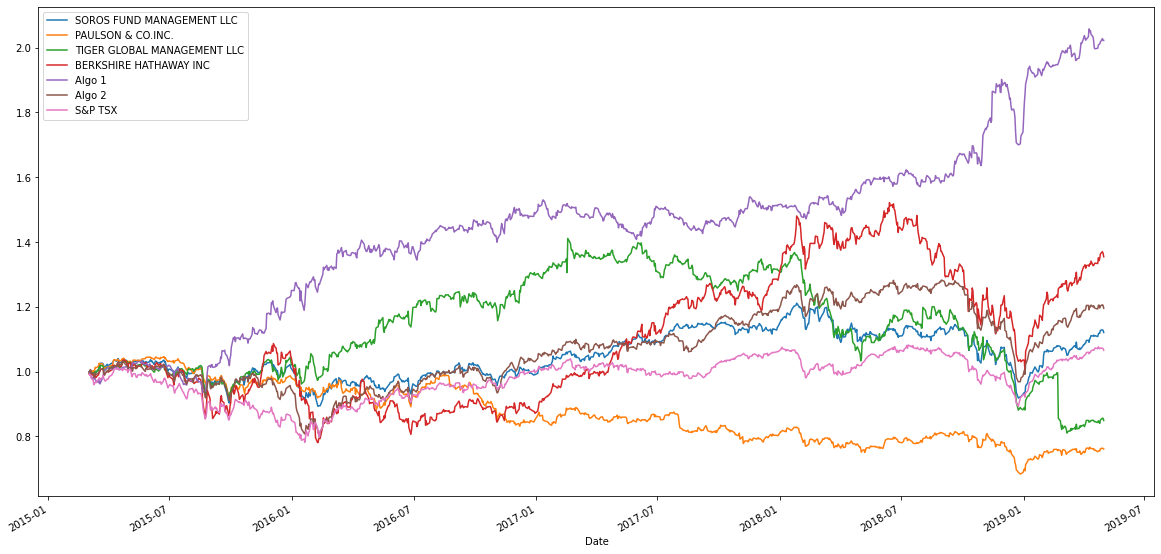

In [110]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + concatenated_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

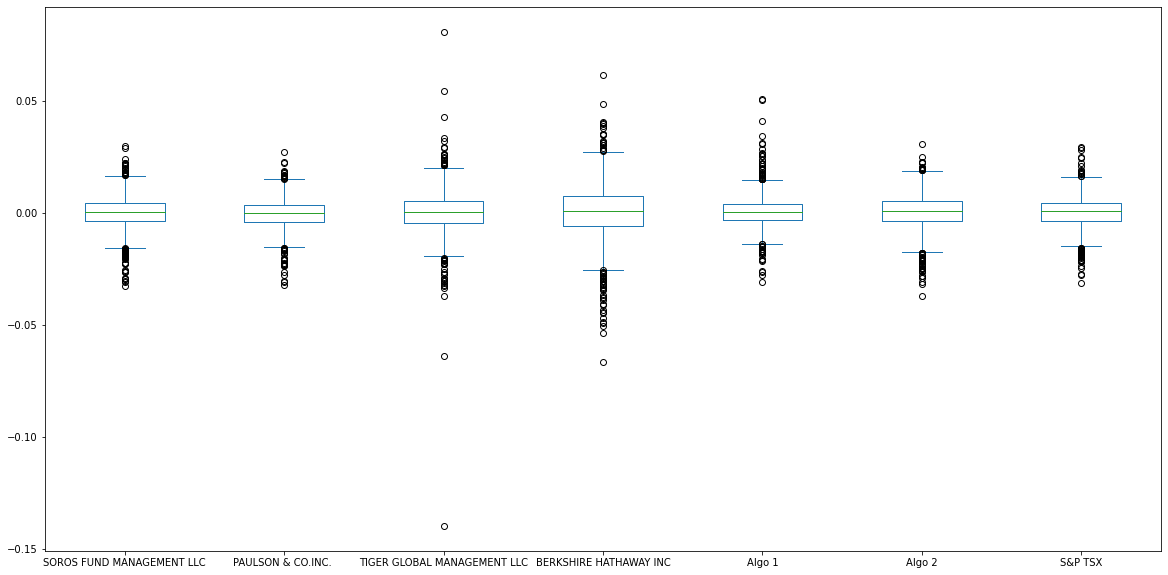

In [111]:
# Box plot to visually show risk
concatenated_df.plot.box(figsize=(20,10))


### Calculate Standard Deviations

In [112]:
# Calculate the daily standard deviations of all portfolios
daily_std = concatenated_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [113]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std.loc['S&P TSX']



0.007034167748577725

### Determine which portfolios are riskier than the S&P TSX 60
<span style="color:maroon;font-weight:500;font-size:15px">
    Algo 2, Algo 1 , BERKSHIRE HATHAWAY INC, SOROS FUND MANAGEMENT LLC portfolios are more riskier than the S&P TSX 60.
</span>

### Calculate the Annualized Standard Deviation

In [114]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std*np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

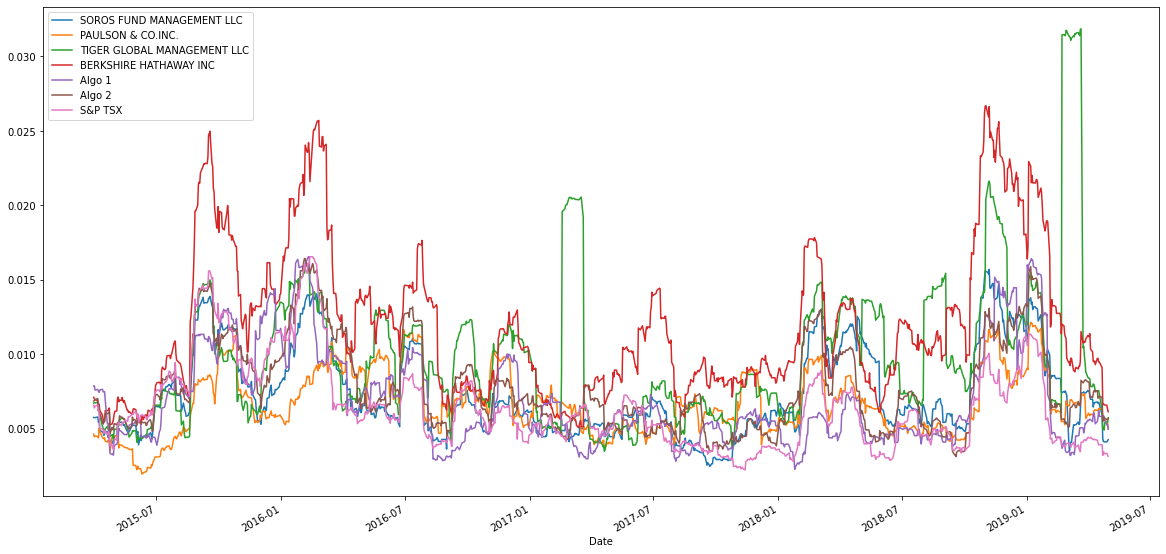

In [115]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_df = concatenated_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_df.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

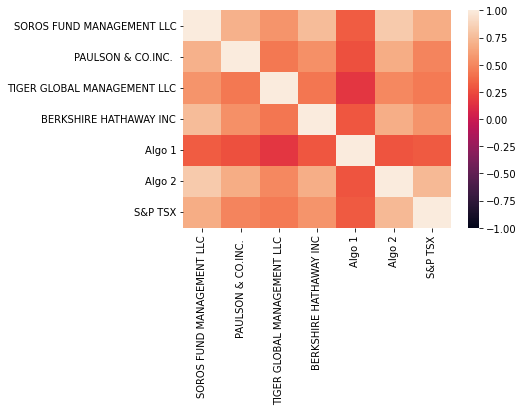

In [116]:
# Calculate correlation
correlation = concatenated_df.corr()

# Plot correlation
sns.heatmap(correlation,vmax=1,vmin=-1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Berkshire Hathaway Inc. Beta'}, xlabel='Date'>

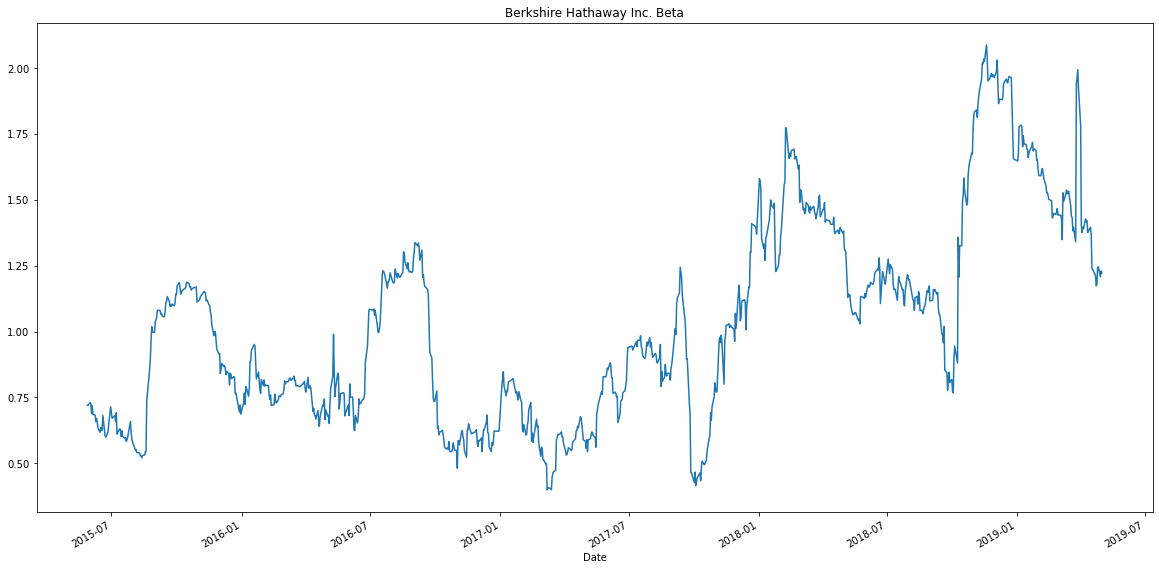

In [117]:
# Calculate variance of S&P TSX
rolling_variance = concatenated_df['S&P TSX'].rolling(window=60).var()

# Calculate covariance of a BERKSHIRE HATHAWAY INC
rolling_covariance = concatenated_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(concatenated_df['S&P TSX'])

# Compute beta
rolling_beta = rolling_covariance/rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20,10), title = 'Berkshire Hathaway Inc. Beta')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

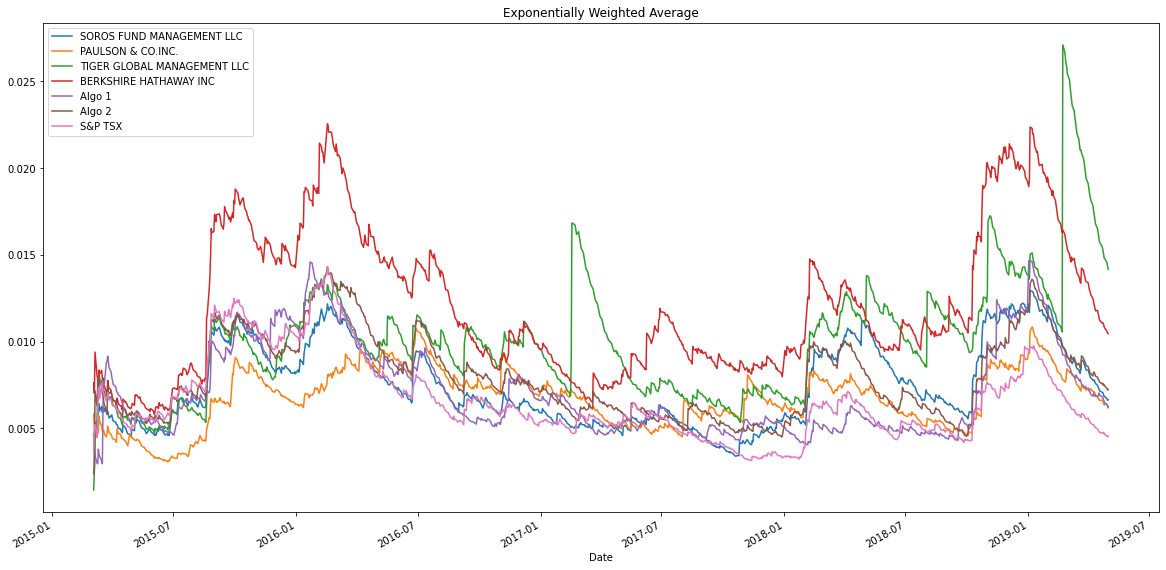

In [118]:

# Create empty dataframe ewm_df and assign column names
ewm_df = pd.DataFrame(columns=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S&P TSX'])

# Calculate ewm for each portfolio and add it to ewm_df
ewm_df["SOROS FUND MANAGEMENT LLC"] = concatenated_df["SOROS FUND MANAGEMENT LLC"].ewm(span=None,halflife=21).std()
ewm_df["PAULSON & CO.INC."] = concatenated_df["PAULSON & CO.INC. "].ewm(span=None,halflife=21).std()
ewm_df["TIGER GLOBAL MANAGEMENT LLC"] = concatenated_df["TIGER GLOBAL MANAGEMENT LLC"].ewm(span=None,halflife=21).std()
ewm_df["BERKSHIRE HATHAWAY INC"] = concatenated_df["BERKSHIRE HATHAWAY INC"].ewm(span=None,halflife=21).std()
ewm_df["Algo 1"] = concatenated_df["Algo 1"].ewm(span=None,halflife=21).std()
ewm_df["Algo 2"] = concatenated_df["Algo 2"].ewm(span=None,halflife=21).std()
ewm_df["S&P TSX"] = concatenated_df["S&P TSX"].ewm(span=None,halflife=21).std()

# Plot ewm
ewm_df.plot(figsize=(20,10),title = 'Exponentially Weighted Average')


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [119]:
# Annualized Sharpe Ratios
sharpe_ratio = (concatenated_df.mean()*252)/annualized_std
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

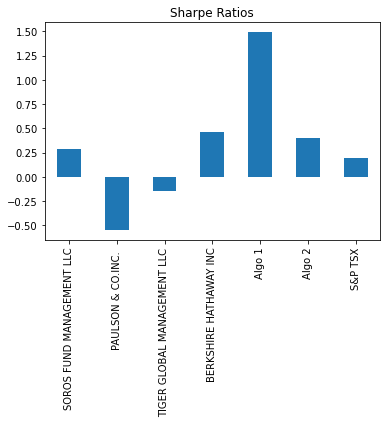

In [120]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title ='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

<span style="color:maroon;font-weight:500;font-size:15px">
    Algo 1 has best cumulative return. Also it has a sharpe ratio of 1.5
    Based on the cumulative returns and sharpe ratio, we can conclude that Algorithmic strategies outperformed both S&P TSX 60 and whale portfolios.
</span>

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [121]:
# Reading data from 1st stock

sheet_id = '1hX8G2OAiRaBsA1BVVP5mefxSW5Yo_Rkwra2ZJHIMVYM'
sheet_name = 'Apple'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
apple_df = pd.read_csv(url,index_col="Date", infer_datetime_format=True, parse_dates=True)

#Rename coloumn to Apple
columns = {'Apple'}
apple_df.columns=columns

apple_df.head()

,Apple
Date,
2015-03-03,32.34
2015-04-03,32.14
2015-05-03,31.60
2015-06-03,31.65
2015-09-03,31.79


In [122]:
# Reading data from 2nd stock
sheet_name = 'Google'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
google_df = pd.read_csv(url,index_col="Date", infer_datetime_format=True, parse_dates=True)

#Rename coloumn to Google
columns = {'Google'}
google_df.columns=columns

google_df.head()


,Google
Date,
2015-03-03,572.07
2015-04-03,571.80
2015-05-03,573.75
2015-06-03,566.13
2015-09-03,567.29


In [123]:
# Reading data from 3rd stock
sheet_name = 'Tesla'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
tesla_df = pd.read_csv(url,index_col="Date", infer_datetime_format=True, parse_dates=True)

#Rename coloumn to Tesla
columns = {'Tesla'}
tesla_df.columns=columns
tesla_df.head()

,Tesla
Date,
2015-03-03,39.91
2015-04-03,40.49
2015-05-03,40.13
2015-06-03,38.78
2015-09-03,38.18


In [124]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([
    apple_df,
    google_df,
    tesla_df
    
],axis='columns', join='inner')

# Sort index in ascending order by the date
my_portfolio = my_portfolio.sort_index()

my_portfolio.head()

,Apple,Google,Tesla
Date,,,
2015-01-04,31.06,541.07,37.52
2015-01-05,32.24,537.90,45.21
2015-01-06,32.63,533.99,49.89
2015-01-07,31.65,521.84,53.83
2015-01-09,26.93,597.79,47.73


In [125]:
# Calculate daily returns
my_portfolio = my_portfolio.pct_change()

# Drop NAs
my_portfolio.dropna(inplace=True)

# Confirm all nulls are dropped
print(f'-----------------\n Nulls in Dataframe')
print(my_portfolio.isnull().sum())
print(f'-----------------')

# Display sample data
print(f'\nFew Records\n')
my_portfolio.head()

-----------------
 Nulls in Dataframe
Apple     0
Google    0
Tesla     0
dtype: int64
-----------------

Few Records



,Apple,Google,Tesla
Date,,,
2015-01-05,0.037991,-0.005859,0.204957
2015-01-06,0.012097,-0.007269,0.103517
2015-01-07,-0.030034,-0.022753,0.078974
2015-01-09,-0.149131,0.145543,-0.113320
2015-01-10,0.017453,0.022583,0.005238


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [126]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_portfolio.dot(weights)

# Display sample data
my_portfolio_returns

Date
2015-01-05    0.079030
2015-01-06    0.036115
2015-01-07    0.008729
2015-01-09   -0.038969
2015-01-10    0.015091
                ...   
2019-11-03    0.019844
2019-11-04    0.019735
2019-12-02   -0.016181
2019-12-03    0.010522
2019-12-04    0.021571
Length: 1047, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [127]:
# Join your returns DataFrame to the original returns DataFrame
concatenated_df = pd.concat([
    concatenated_df,
    my_portfolio_returns
], axis='columns', join='inner')

#print(concatenated_df.columns.tolist())

# Rename column
concatenated_df = concatenated_df.rename(columns=
{
    0:'My Portfolio'

})

# Sort index in ascending order by the date
concatenated_df = concatenated_df.sort_index()

# Display sample data
concatenated_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.092337
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,0.066055
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.054447
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655,0.050081
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139,0.032962


In [128]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
concatenated_df = concatenated_df.dropna()
concatenated_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
My Portfolio                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Cumulative Returns

<AxesSubplot:xlabel='Date'>

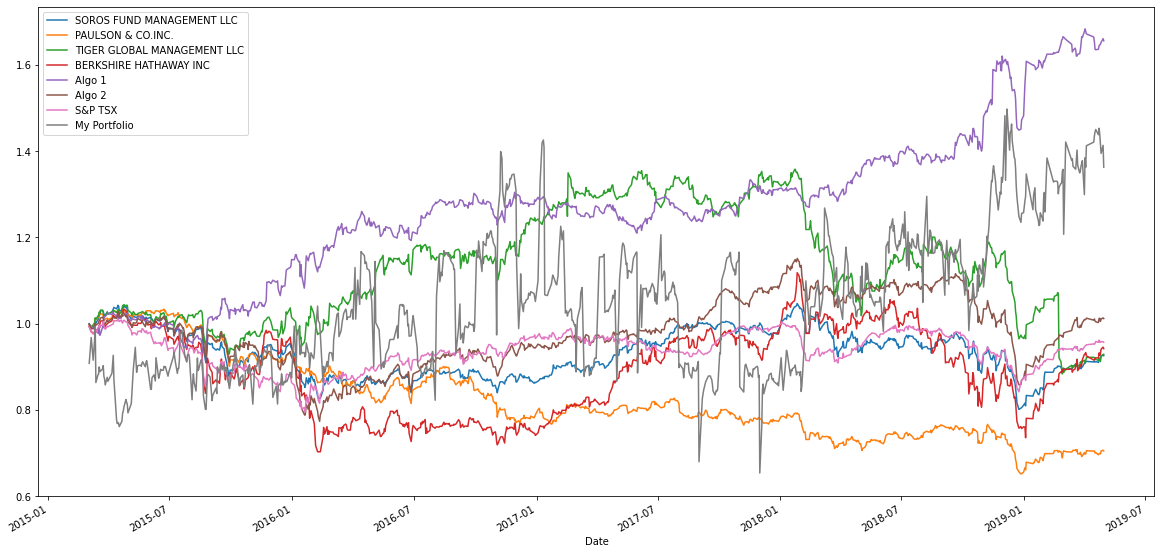

In [129]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + concatenated_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

### Calculate the Annualized Standard Deviation

In [130]:
# Calculate daily standard deviation
daily_std = concatenated_df.std()

# Calculate annualized standard deviation
annualized_std = daily_std*np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.126432
PAULSON & CO.INC.              0.110906
TIGER GLOBAL MANAGEMENT LLC    0.176360
BERKSHIRE HATHAWAY INC         0.206698
Algo 1                         0.120485
Algo 2                         0.133096
S&P TSX                        0.112542
My Portfolio                   0.752531
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

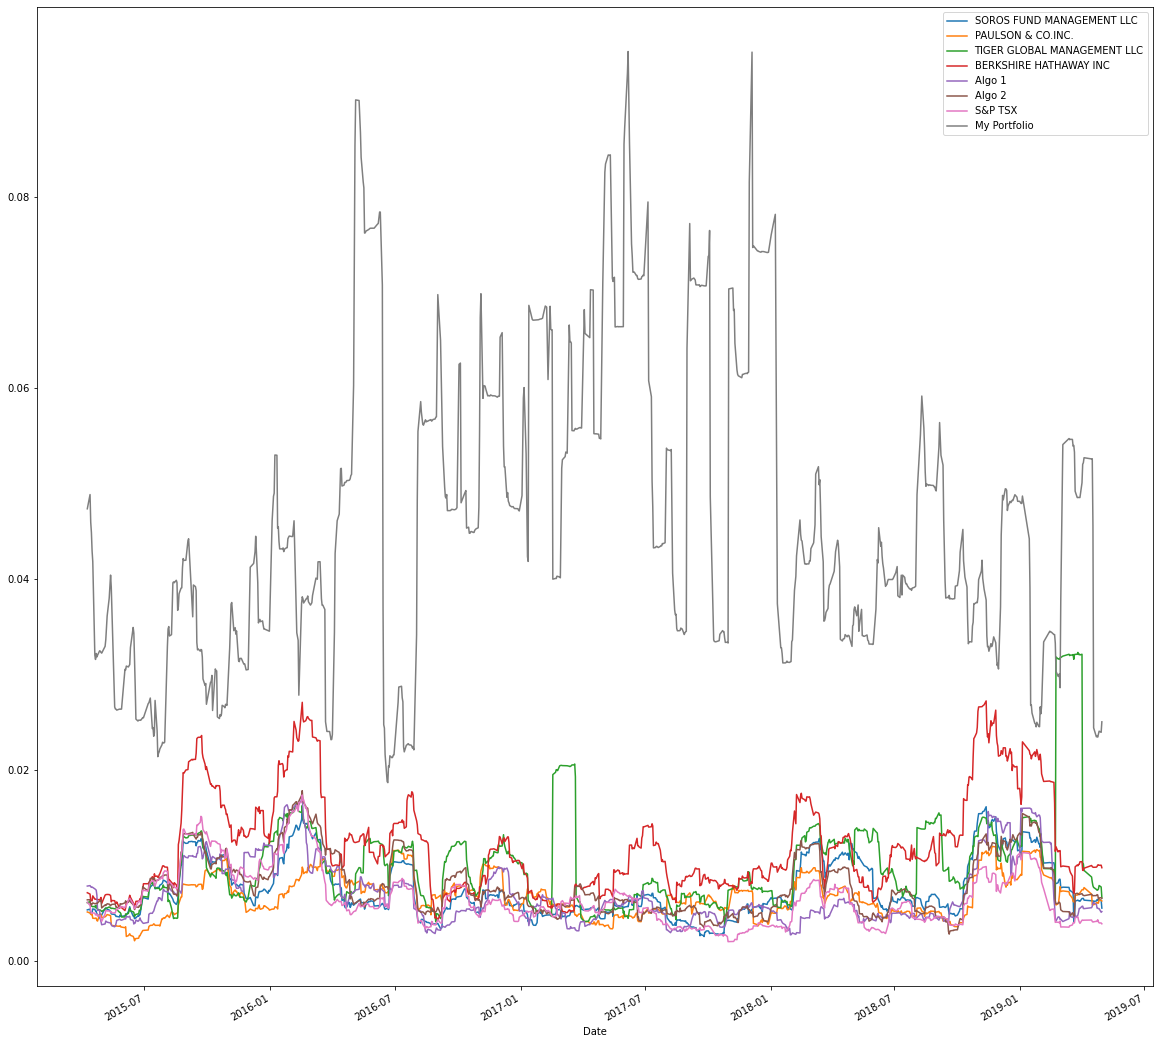

In [131]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_df = concatenated_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_df.plot(figsize=(20,20))


### Calculate and plot the correlation

<AxesSubplot:>

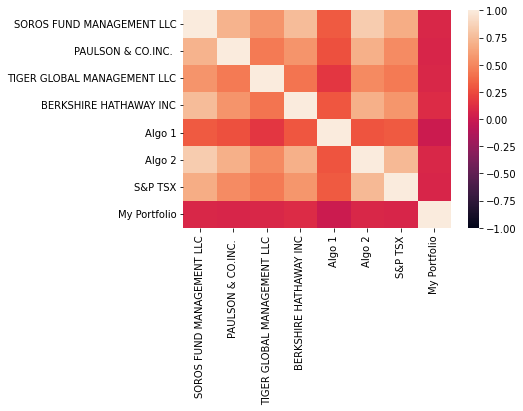

In [132]:
# Calculate Correlation
correlation = concatenated_df.corr()

# Plot correlation
sns.heatmap(correlation,vmax=1,vmin=-1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'My Portfolio Beta'}, xlabel='Date'>

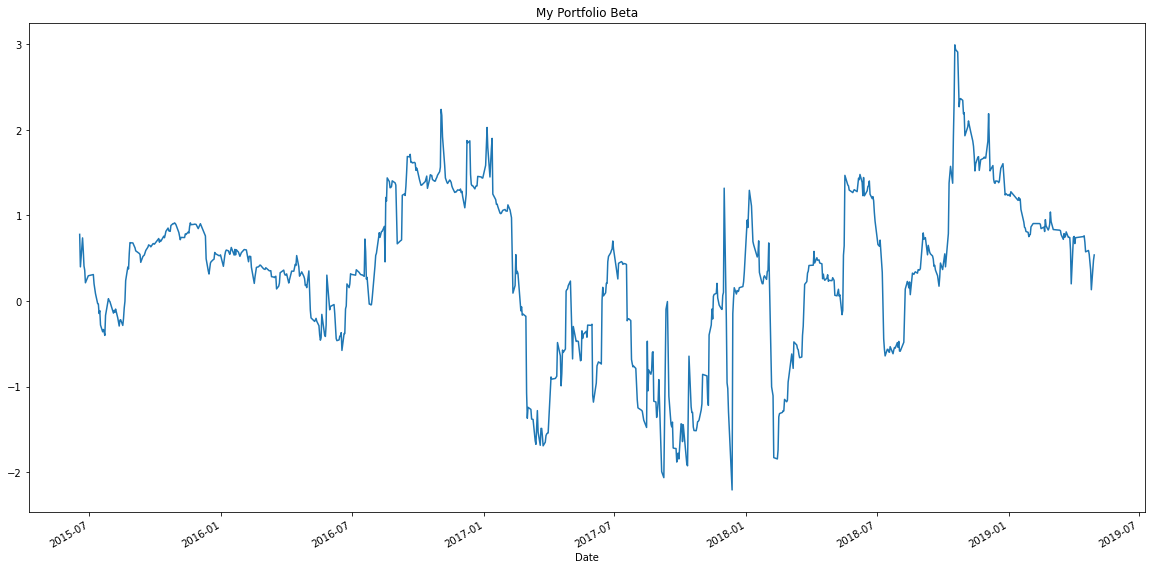

In [133]:

# Calculate rolling variance of S&P TSX
rolling_variance = concatenated_df['S&P TSX'].rolling(window=60).var()

# Calculate rolling covariance of a single portfolio
rolling_covariance = concatenated_df['My Portfolio'].rolling(window=60).cov(concatenated_df['S&P TSX'])

# Compute beta
rolling_beta = rolling_covariance/rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20,10), title = 'My Portfolio Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [134]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (concatenated_df.mean()*252)/annualized_std

<AxesSubplot:title={'center':'Sharpe Ratios'}>

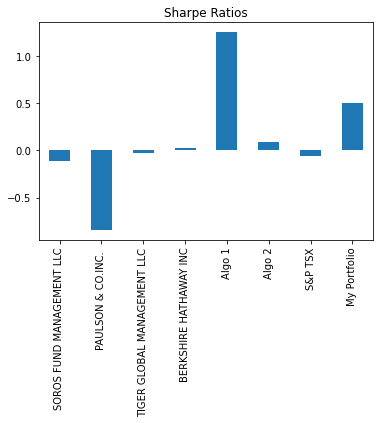

In [135]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title ='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!


<span style="color:maroon;font-weight:500;font-size:15px">
    Algo 1 has best cumulative return. Also it has a sharpe ratio of 1.5
    Based on the cumulative returns and sharpe ratio, we can conclude that Algorithmic strategies outperformed my portfolio.
</span>